# ResNet50 - Pretrained

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# =====================================================
# PARAMETER (SMALL & AMAN)
# =====================================================
IMG_SIZE = (96, 96)
BATCH_SIZE = 32
EPOCHS = 10

TRAIN_DIR = "../dataset_split/train"
VAL_DIR   = "../dataset_split/val"

# =====================================================
# DATA GENERATOR
# =====================================================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# =====================================================
# EFFICIENTNETB0 SMALL
# =====================================================
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(96, 96, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)   # head kecil
x = Dropout(0.3)(x)

output = Dense(train_gen.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# =====================================================
# COMPILE
# =====================================================
model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Found 6941 images belonging to 5 classes.
Found 2117 images belonging to 5 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 96, 96, 3) │          0 │ input_layer[0][0] │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 96, 96, 3) │          7 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 96, 96, 3) │          0 │ normalization[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 97, 97, 3) │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 48, 48,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 48, 48,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 48, 48,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 48, 48,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 48, 48,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 48, 48,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 48, 48,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 48, 48,    │        512 │ block1a_se_excit

 Total params: 4,131,880 (15.76 MB)

 Trainable params: 82,309 (321.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [2]:
# =====================================================
# TRAINING
# =====================================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

# =====================================================
# SAVE MODEL (.h5)
# =====================================================
model.save("../models/efficientnetb0_96.h5")

Epoch 1/10
 66/217 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step - accuracy: 0.3908 - loss: 1.5019

c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/217 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.4876 - loss: 1.3504

c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


217/217 ━━━━━━━━━━━━━━━━━━━━ 54s 225ms/step - accuracy: 0.7264 - loss: 0.8854 - val_accuracy: 0.9268 - val_loss: 0.3762
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 45s 206ms/step - accuracy: 0.9022 - loss: 0.3655 - val_accuracy: 0.9561 - val_loss: 0.1936
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 45s 208ms/step - accuracy: 0.9251 - loss: 0.2527 - val_accuracy: 0.9650 - val_loss: 0.1368
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 47s 215ms/step - accuracy: 0.9389 - loss: 0.2028 - val_accuracy: 0.9726 - val_loss: 0.1082
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 49s 228ms/step - accuracy: 0.9543 - loss: 0.1613 - val_accuracy: 0.9750 - val_loss: 0.0894
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 50s 229ms/step - accuracy: 0.9522 - loss: 0.1488 - val_accuracy: 0.9778 - val_loss: 0.0805
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 54s 249ms/step - accuracy: 0.9612 - loss: 0.1314 - val_accuracy: 0.9811 - val_loss: 0.0696
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 53s 243ms/step - accuracy: 0.9663 - loss: 0.1117 - val

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

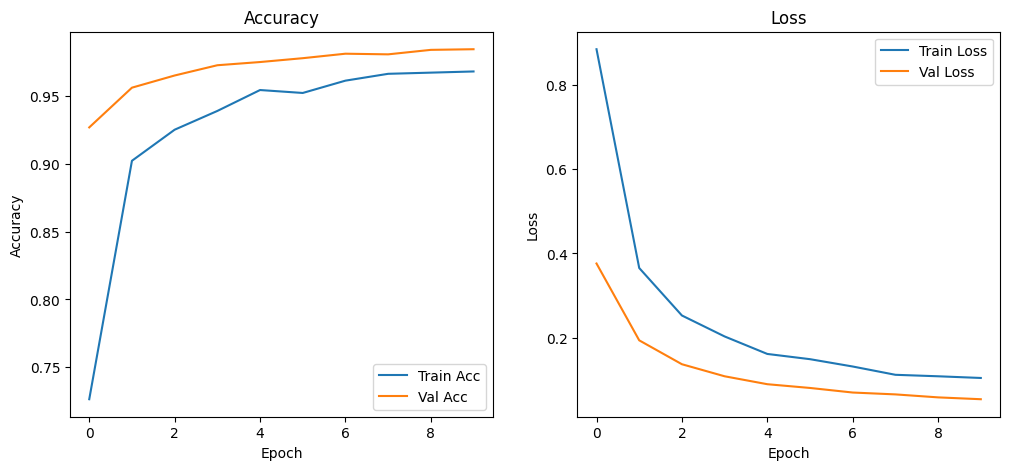

In [5]:
# Grafik Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

 9/67 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step

c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step


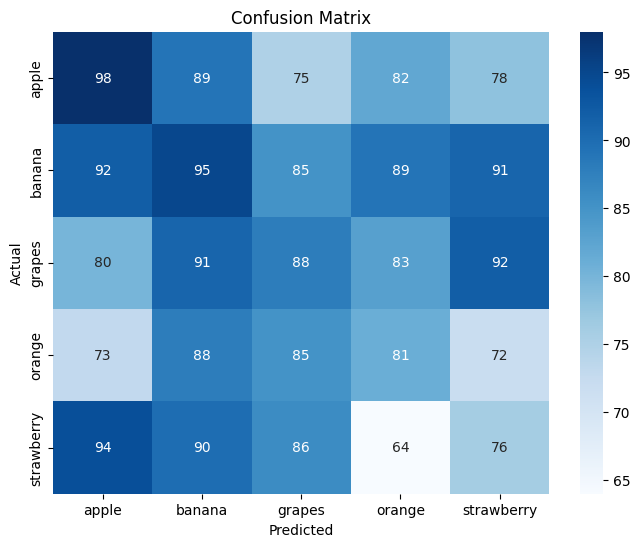

=== Classification Report EfficientB0 ===
              precision    recall  f1-score   support

       apple       0.22      0.23      0.23       422
      banana       0.21      0.21      0.21       452
      grapes       0.21      0.20      0.21       434
      orange       0.20      0.20      0.20       399
  strawberry       0.19      0.19      0.19       410

    accuracy                           0.21      2117
   macro avg       0.21      0.21      0.21      2117
weighted avg       0.21      0.21      0.21      2117



In [7]:
# =====================================================
# CONFUSION MATRIX & CLASSIFICATION REPORT
# =====================================================
# Predict
val_gen.reset()
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("=== Classification Report EfficientB0 ===")
print(report)